# Projet numérique MAP 432
## Méthode de Monte-Carlo

### Partie 1.
En discrétisant le domaine $\mathbb{D} = [0,1]^2 \subset \mathbb{R}^2$, calculer numériquement une solution approchée de l'équation
de Laplace
$$
x, y \in \mathbb{D}, \partial_x^2f(x,y) + \partial_y^2f(x,y) =0
$$
avec conditions aux bords données par la fonction $\varphi$. On utilisera la méthode de Monte-Carlo.

Par solution en cours, on peux resoudre équation EDP par approximation numérique pour $x \in \mathbb{D}_L$ :
$$
F(x) = \mathbb{E}_x[\varphi_L(X_{T_{{\mathbb{D}}}})]
$$

### Étapes de la méthode de Monte Carlo

1. Générer $K$ marches aléatoires indépendantes, partant de $x$:
$$
1 \le i \le K,\qquad (X_n^{(i)})_{n\le 0}
$$
2. On obtient $K$ variables indépendantes $(X_{T_{D}}^{(i)})_{1\le K}$ .
3. Pour $K$ grand (par la loi des grands nombres):
$$
 \frac{1}{K}\sum_{i=1}^K \varphi_L(X_{T_{{\mathbb{D}}}}) \approx \mathbb{E}_x[\varphi_L(X_{T_{{\mathbb{D}}}})]
$$

In [72]:
import numpy as np
import matplotlib.pyplot as plt

In [73]:
# Définir la taille de la grille et le nombre de particules
grid_size = 100  # Taille de la grille
num_particles = 100000  # Nombre de particules

In [74]:
# Créer une grille pour stocker les valeurs potentielles
phi = np.zeros((grid_size, grid_size))

In [75]:
# Définir la fonction de condition aux bords
def boundary_function(x, y):
    # On peut utiliser différent fonction de condition aux bords
    #pour moi, je vais choisir phi(x,y) = sin(xy)
    return np.sin(x*y)

In [76]:
# Définir les limites du domaine
domain_min = 0
domain_max = 1

In [77]:
# Générer des particules aléatoirement dans le domaine
x_particles = np.random.uniform(domain_min, domain_max, num_particles)
y_particles = np.random.uniform(domain_min, domain_max, num_particles)

In [78]:
# Réaliser la simulation Monte-Carlo
for i in range(num_particles):
    x = int((x_particles[i] - domain_min) / (domain_max - domain_min) * (grid_size - 1))
    y = int((y_particles[i] - domain_min) / (domain_max - domain_min) * (grid_size - 1))
    
    # Utilisez la fonction de condition aux bords pour définir les valeurs aux bords
    phi[x, y] = boundary_function(x_particles[i], y_particles[i])

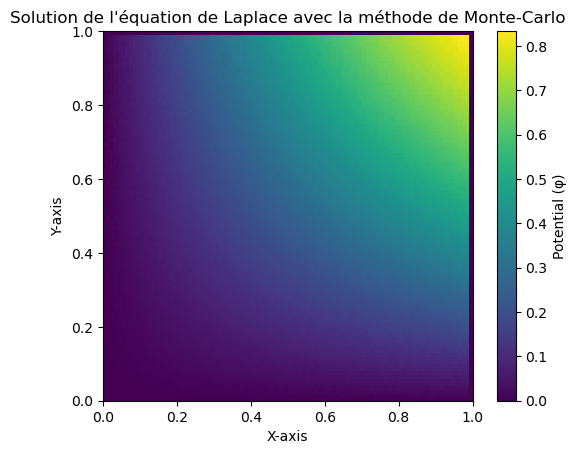

In [79]:
# Afficher la solution
plt.imshow(phi, extent=(domain_min, domain_max, domain_min, domain_max), origin='lower', cmap='viridis')
plt.colorbar(label='Potential (φ)')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Solution de l\'équation de Laplace avec la méthode de Monte-Carlo')
plt.show()